In [1]:
#First things first, lets import data that we will be using and the necessary libraries that we need to perform the analysis

#Libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#Data
churn_df = pd.read_csv('churn_clean.csv')

In [2]:
#Lets check the first few rows to get an idea of the data we are working with
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
#It isn't showing all of the columns so I am going to adjust that setting
pd.set_option('display.max_columns', None)

In [4]:
#Now lets run it again
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
#Now that we have an idea of what we are working with, lets do some preprocessing

#Lets select relevant columns first. Since we are using K-means clustering all the values need to be numerical.

#We are going to use Tenure and Bandwidth_GB_Year

columns = churn_df[['Tenure', 'Bandwidth_GB_Year']]

In [6]:
#If there are any null values lets drop those
columns = columns.dropna()

In [7]:
#The last preprocessing step we will do is standardize the data so that each of the values in the columns holds equal weight
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(columns)

In [8]:
#Lets convert our scaled columns back into a dataframe
standardized_columns = pd.DataFrame(scaled_columns, columns=['Tenure', 'Bandwidth_GB_Year'])

In [17]:
#Lets save this for our submission
standardized_columns.to_csv('standardized_columns.csv', index=False)

In [9]:
#The next step in the process is to determine the correct number of clusters (which would be k)

#A way to do this is to use the elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_columns)
    wcss.append(kmeans.inertia_)

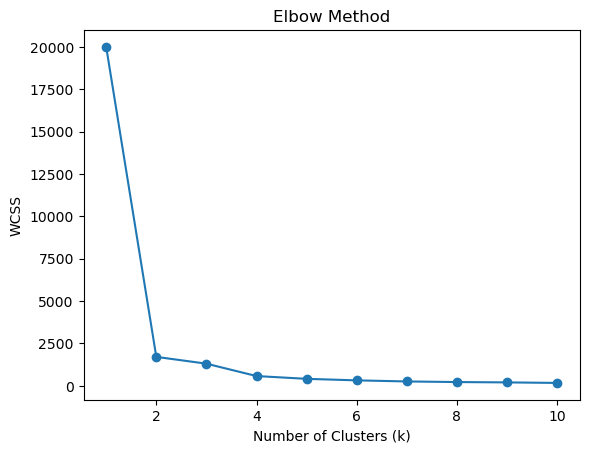

In [10]:
#After running the code for the elbow method lets plot it so we can determine the optimal k number
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [11]:
#Looking at the above plot, we can see that the bend can be seen at 2. This means that our k value is 2

#With this info we can now set our k value to 2
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_columns)

KMeans(n_clusters=2, random_state=42)

In [12]:
#Add cluster labels to my initial dataset
columns['Cluster'] = kmeans.labels_

In [13]:
#Now lets summarize the clusters
print(columns.groupby('Cluster').mean())

            Tenure  Bandwidth_GB_Year
Cluster                              
0         9.133764        1312.287977
1        59.928772        5473.227310


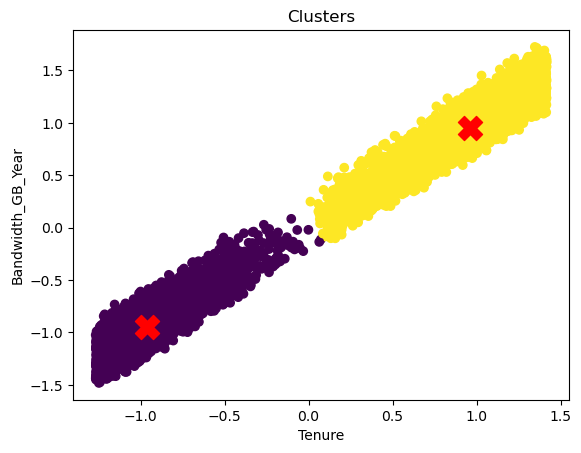

In [14]:
#And now lets visualize them and see what we get
plt.scatter(scaled_columns[:, 0], scaled_columns[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('Clusters')
plt.xlabel('Tenure')
plt.ylabel('Bandwidth_GB_Year')
plt.show()

In [15]:
#To see the quality of the cluster we can use a Silhouette Score
#This measures how similar a datapoint is to other clusters

silhouette_avg = silhouette_score(scaled_columns, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8126288795519078


In [16]:
#We got out plot, upon observing it we can determine that:
    #As tenure increases, the GB per year also increases
    #There are two clusters, a low tenure/Gb usage group and a long tenure/high usage group
    
#Some follow up actions that we can do from observing this data:
    #Come up with an oboarding strategy/routine that can be used to encourage the lower tenured people to stay for longer.
    #Focus on keeping the people who have longer tenures happy, a survey could be sent out asking what things they like and dislike so imporvements can be made to keep them and potentially help keep the shorter tenured people as well